In [1]:
%matplotlib inline
# Switch to ''%matplotlib ipympl' for interactive plots
import warnings
import imp
import pickle
import lmfit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# Styling
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
# Initialise wrapper and test datasets
wrapper_fpath = (r"..\mobius.py")
wr = imp.load_source('mobius', wrapper_fpath)
wr.initialize('persist.dll')

# Calibration functions
calib_fpath = (r"..\mobius_calib_uncert_lmfit.py")
cu = imp.load_source('mobius_calib_uncert_lmfit', calib_fpath)

In [3]:
dataset = wr.DataSet.setup_from_parameter_and_input_files('langtjernparameters.dat', 'langtjerninputs.dat')

In [4]:
comparisons = [
    ('Reach flow', ['Langtjern03'], 'Discharge', [])
]

In [5]:
param_df = cu.get_double_parameters_as_dataframe(dataset)
param_df

,name,unit,index,min_value,initial_value,max_value
0,Snow multiplier,dimensionless,"(Forest and wetland,)",0.5000,1.00,1.5
1,Snow melt temperature,°C,"(Forest and wetland,)",-4.0000,0.00,4.0
2,Degree day melt factor,mm/°C/day,"(Forest and wetland,)",1.0000,3.00,4.0
3,Rain multiplier,dimensionless,"(Forest and wetland,)",0.5000,1.00,1.5
4,Initial snow depth,mm SWE,"(Forest and wetland,)",0.0000,0.00,9999.0
5,Degree day evapotranspiration,mm/°C/day,"(Forest and wetland,)",0.0500,0.15,0.2
6,Growing degree threshold,°C,"(Forest and wetland,)",-4.0000,1.00,4.0
7,Canopy interception,mm/day,"(Forest and wetland,)",0.0000,0.00,0.3
8,Initial water depth,mm,"(Direct runoff, Forest and wetland)",0.0000,0.00,9999.0
9,Initial water depth,mm,"(Organic layer, Forest and wetland)",0.0000,290.00,9999.0


In [6]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)


Goodness of fit for Reach flow [Langtjern03] vs Discharge []:
Mean error (bias): 0.005081
Mean absolute error: 0.012276
Mean square error: 0.000515
Nash-Sutcliffe coefficient: 0.402624
Number of observations: 1825



In [7]:
calib_df = param_df.loc[[2, 5, 29, 30, 31, 47, 48, 56, 57, 61, 62, 66, 67]].reset_index(drop=True)
calib_df

,name,unit,index,min_value,initial_value,max_value
0,Degree day melt factor,mm/°C/day,"(Forest and wetland,)",1.000,3.00,4.0
1,Degree day evapotranspiration,mm/°C/day,"(Forest and wetland,)",0.050,0.15,0.2
2,Time constant,days,"(Organic layer, Forest and wetland)",1.000,2.00,9999.0
3,Time constant,days,"(Mineral layer, Forest and wetland)",1.000,15.00,9999.0
4,Time constant,days,"(Groundwater, Forest and wetland)",1.000,70.00,9999.0
5,a,1/m2,"(Langtjern03,)",0.001,0.05,1.0
6,b,dimensionless,"(Langtjern03,)",0.300,0.50,0.5
7,Percolation matrix,dimensionless,"(Forest and wetland, Direct runoff, Direct run...",0.000,0.10,1.0
8,Percolation matrix,dimensionless,"(Forest and wetland, Direct runoff, Organic la...",0.000,0.90,1.0
9,Percolation matrix,dimensionless,"(Forest and wetland, Organic layer, Organic la...",0.000,0.40,1.0


In [8]:
calib_df['short_name'] = [
    'DDfmelt',
    'DDfet',
    'T_o',
    'T_m',
    'T_g',
    'a',
    'b',
    'runoff_r',
    'baseflow_r',
    'runoff_o',
    'baseflow_o',
    'runoff_m',
    'baseflow_m',
]

params = cu.parameter_df_to_lmfit(calib_df)

params['baseflow_o'].set(expr = '1.0-runoff_o')
params['baseflow_m'].set(expr = '1.0-runoff_m')
params['T_o'].min = 1.0
params['T_o'].max = 2.0
params['T_m'].min = 1.0
params['T_m'].max = 15.0
params['T_g'].min = 30.0
params['T_g'].max = 200.0
params['b'].max = 0.7

In [9]:
%%time
mi, res = cu.minimize_residuals(params, dataset, comparisons, method='leastsq', norm=False, skip_timesteps=365)
print('Optimization results\n')
lmfit.report_fit(res)
print('\n\nOptimized parameter values:\n')
res.params.pretty_print(precision=3)

Optimization results

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 134
    # data points      = 1460
    # variables        = 11
    chi-square         = 0.45736669
    reduced chi-square = 3.1564e-04
    Akaike info crit   = -11757.9539
    Bayesian info crit = -11699.8057
##  Warning: uncertainties could not be estimated:
    T_o:         at initial value
    b:           at initial value
    runoff_r:    at initial value
[[Variables]]
    DDfmelt:     3.33872103 (init = 3)
    DDfet:       0.19998096 (init = 0.15)
    T_o:         2.00000000 (init = 2)
    T_m:         10.9472815 (init = 15)
    T_g:         199.991046 (init = 70)
    a:           0.02266877 (init = 0.05)
    b:           0.50000000 (init = 0.5)
    runoff_r:    0.10000000 (init = 0.1)
    baseflow_r:  0.88273643 (init = 0.9)
    runoff_o:    0.37958918 (init = 0.4)
    baseflow_o:  0.62041082 == '1.0-runoff_o'
    runoff_m:    0.37486238 (init = 0.8)
    baseflow_m:  0.62513762 == '1


Goodness of fit for Reach flow [Langtjern03] vs Discharge []:
Mean error (bias): 0.003825
Mean absolute error: 0.011685
Mean square error: 0.000450
Nash-Sutcliffe coefficient: 0.477624
Number of observations: 1825



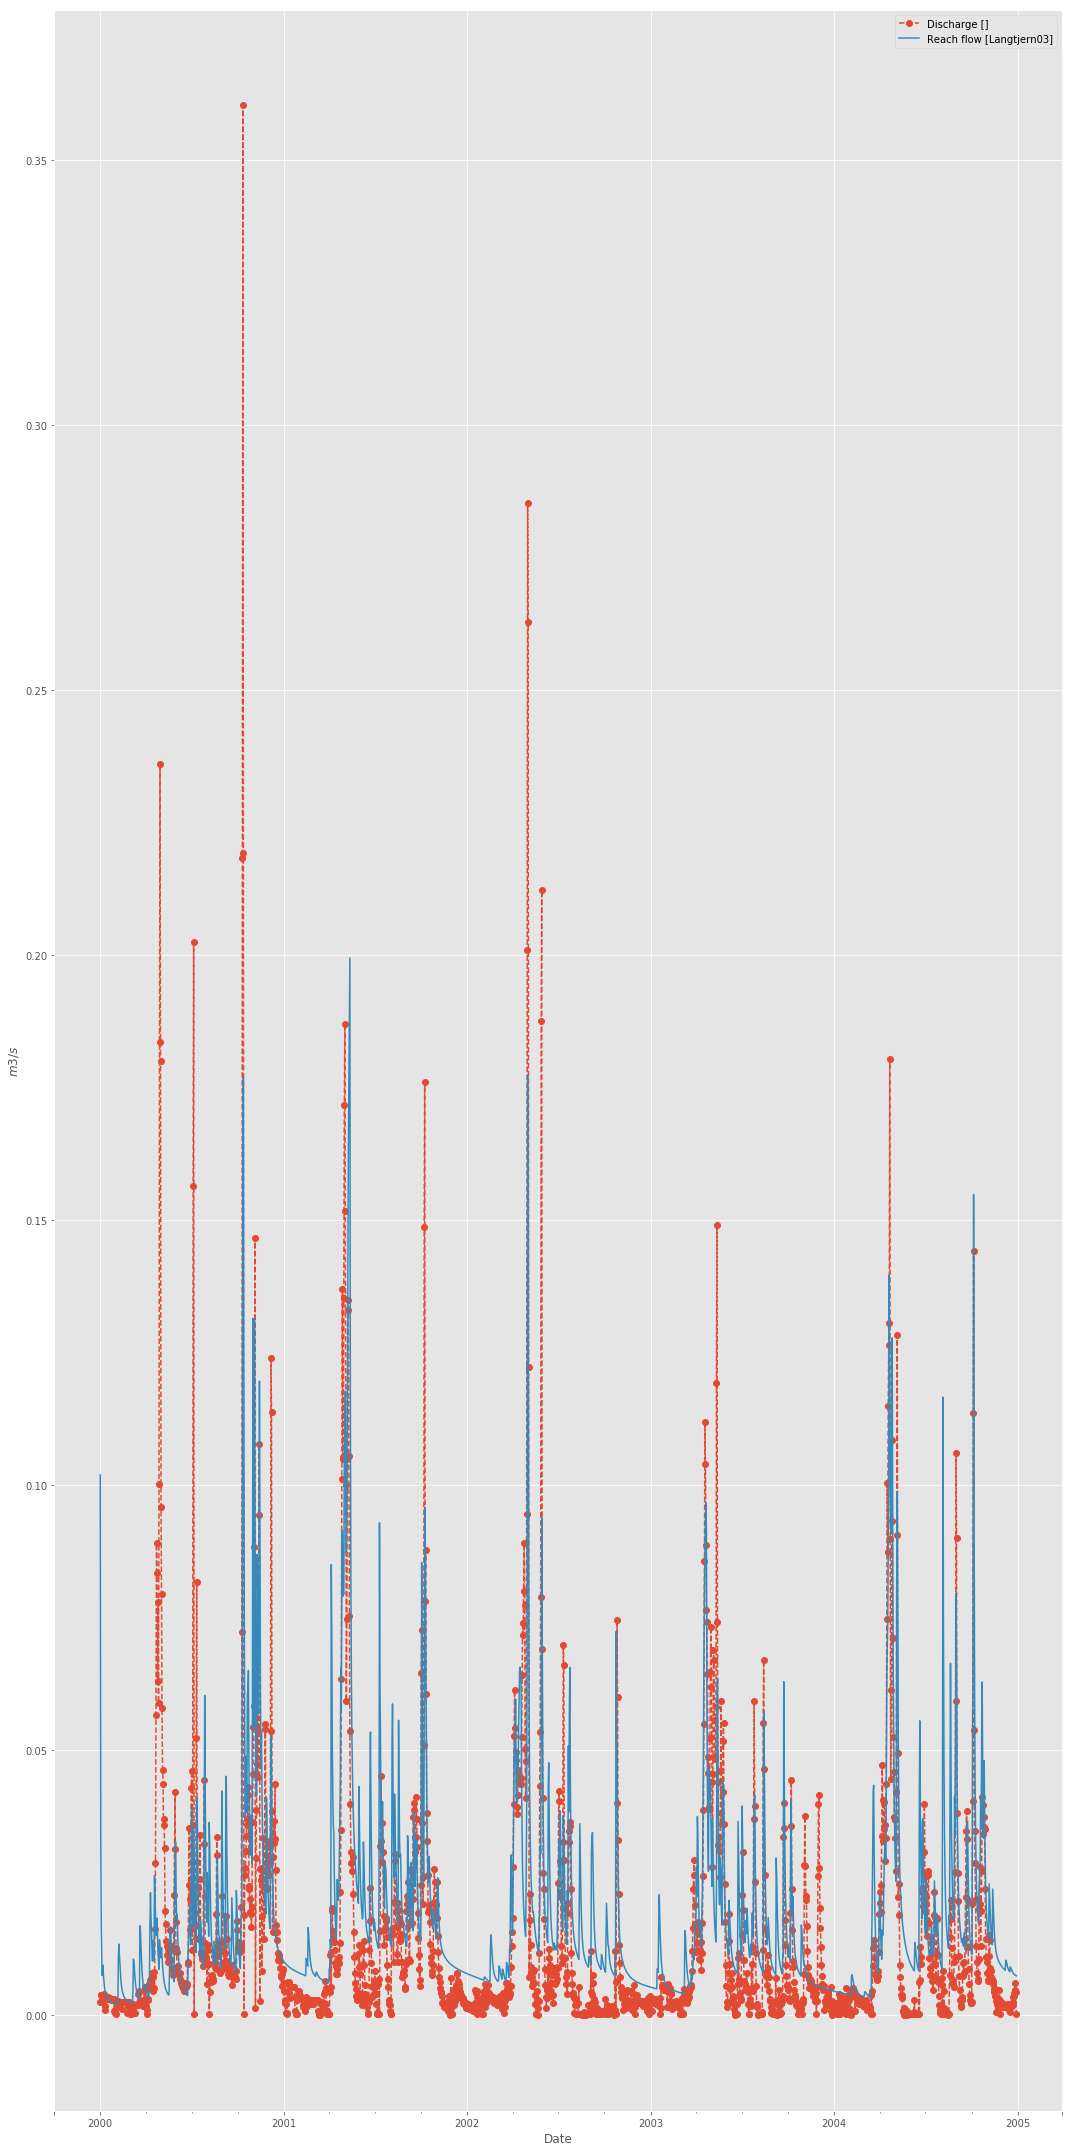

In [12]:
#print(res.params)
cu.set_parameter_values(res.params, dataset)
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)